<a id='back-to-top'></a>

---
#                                                     RNN Multi-Variate analysis

---

# Load preprocessed MSFT stock data with the augmented XLK prices for one year (2014) and make short term (intraday) predictions.

----

Data: We have stock data for every minute during trading hours (09:30 to 16:00 EST). This is equivalent to 390 samples per day. We will use two months worth of stock data (~ 44 * 390 = 17160 samples) to train a multi-step RNN based network.

##  [Prologue: Correlation analysis between MSFT and XLK stock prices](#MSFT_XLK_Corr)
     Determine the best two months (continguous) during the year 2014 when MSFT and XLK are most positively correlated. This is needed for Task:5 below.

##  [Task:4 Effect of XLK prices on MSFT price - Study1](#RNN_MSFT_XLK_1)
     Based on single-variate analysis done in the previous section (see MSFT-RNN-single-variate.ipynb), we have observed that the model that predicted stock prices for the near future performed better compared to the rest of the models. We will now perform a multi-variate price prediction of MSFT stock price (one-minute intervals) using XLK prices as well (represents tech sector overall). The first experiment uses the same time-period (2014/01 to 2014/02) as the single-variate analysis in Task#3 (see MSFT-RNN-single-variate.ipynb).
     

##  [Task:5 Effect of XLK prices on MSFT price - Study2](#RNN_MSFT_XLK_2)
     This is same as above except the 2-month training period is different. We will analyse to pick the best 2-month period during 2014 year where MSFT prices positively correlates the most against XLK prices.
     

In [1]:
import tensorflow as tf
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<a id='MSFT_XLK_Corr'></a>
[back-to-top](#back-to-top)
## Prologue: Correlation analysis between MSFT and XLK prices

In [3]:
import pandas as pd
import glob

path ='C:/cygwin64/home/mpatnam/CSCIE63/CSCI E-89 Deep Learning/Project/Processed'
stockfile = path + "/msft_stock.2014.csv"   # Load 2014 year data
stockdata = pd.read_csv(stockfile)

print('Total rows x columns:', stockdata.shape)
stockdata

Total rows x columns: (97701, 25)


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
0,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510.0,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
1,20140102,931,33.6932,33.7293,33.6661,33.7157,206817.0,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2,20140102,932,33.7112,33.7293,33.6030,33.6120,227216.0,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
3,20140102,933,33.6120,33.6300,33.5759,33.6120,170074.0,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
4,20140102,934,33.6120,33.6391,33.6120,33.6300,48095.9,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278
5,20140102,935,33.6300,33.6481,33.6120,33.6327,61244.2,1,0,0.0,...,2014-01-02 09:35:00,-0.152891,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118
6,20140102,936,33.6300,33.6481,33.6210,33.6210,24677.0,1,0,0.0,...,2014-01-02 09:36:00,-0.187625,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631
7,20140102,937,33.6300,33.6526,33.6210,33.6481,120999.0,1,0,0.0,...,2014-01-02 09:37:00,-0.107172,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791
8,20140102,938,33.6391,33.6481,33.6120,33.6481,112894.0,1,0,0.0,...,2014-01-02 09:38:00,-0.107172,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891
9,20140102,939,33.6481,33.6481,33.6231,33.6300,50620.0,1,0,0.0,...,2014-01-02 09:39:00,-0.160906,33.1744,33.1510,-0.070536,-0.196891,170.236,170.153,-0.048756,-0.217565


In [4]:
# print header columns
print('--------------------------------------------------------------')
print('Column datatypes:\n', stockdata.dtypes)
print('--------------------------------------------------------------')
print('Sample row:\n', stockdata.iloc[2])   # display 2nd row
print('--------------------------------------------------------------')
print('Sample MSFT stock prices')
print(stockdata['Close'].head())  # this is the column of interest with temperature data

--------------------------------------------------------------
Column datatypes:
 Date                 int64
Time                 int64
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
SplitFactor          int64
Earnings             int64
Dividends          float64
stock.Return       float64
Gain               float64
Loss               float64
RSI                float64
DateTimeStr         object
DateTime            object
stock.CumReturn    float64
etf.Open           float64
etf.Close          float64
etf.Return         float64
etf.CumReturn      float64
spy.Open           float64
spy.Close          float64
spy.Return         float64
spy.CumReturn      float64
dtype: object
--------------------------------------------------------------
Sample row:
 Date                          20140102
Time                               932
Open                           33.7112
High                           33.72

In [6]:
#
# Data wrangling: 
# 1. Convert Date and Time columns into pandas DateTime type
# 2. create index on date column for faster lookups
#

print("--------------------------------------------------------")
# convert market data volume to int 
stockdata['Volume'] = stockdata['Volume'].map(int)
# convert Date/Time columns into native datetime type
stockdata['DateTime'] = pd.to_datetime(stockdata['DateTime'].map(str), format="%Y-%m-%d %H:%M:%S")

# set DateTime as table index column
stockdata=stockdata.set_index(pd.DatetimeIndex(stockdata['DateTime']))
stockdata

--------------------------------------------------------


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244,1,0,0.0,...,2014-01-02 09:35:00,-0.152891,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677,1,0,0.0,...,2014-01-02 09:36:00,-0.187625,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999,1,0,0.0,...,2014-01-02 09:37:00,-0.107172,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894,1,0,0.0,...,2014-01-02 09:38:00,-0.107172,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891


In [20]:
#
# Find the correlation of MSFT stock (close price) against XLK and SPY prices
# Entire 2014 data
#
df=stockdata[['Close', 'etf.Close', 'spy.Close']]
df=df.rename(index=str, columns={"Close":"MSFT.Close", "etf.Close":"XLK.Close", "spy.Close":"SPY.Close"})
df.corr()

,MSFT.Close,XLK.Close,SPY.Close
MSFT.Close,1.000000,0.964311,0.941512
XLK.Close,0.964311,1.000000,0.987342
SPY.Close,0.941512,0.987342,1.000000


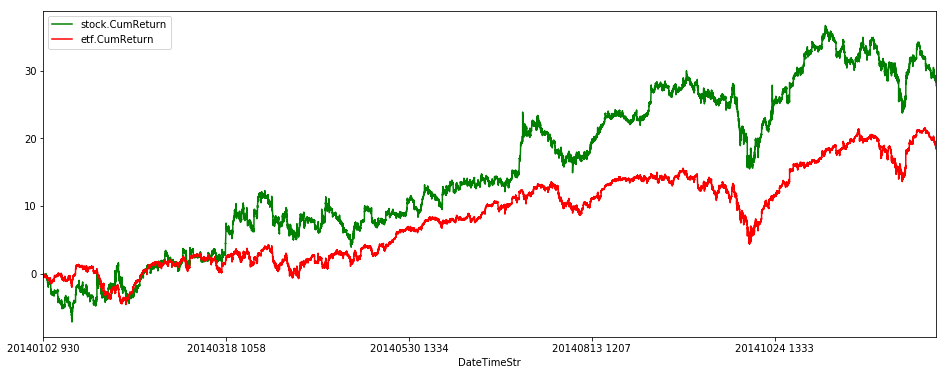

In [96]:
# plot cum returns of stock vs etf vs index
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.subplot(1,1,1)
stockdata.plot(x='DateTimeStr', y='stock.CumReturn', color='green', ax=plt.gca())
stockdata.plot(x='DateTimeStr', y='etf.CumReturn', color='red', ax=plt.gca())
#stockdata_data.plot(x='DateTimeStr', y='spy.CumReturn', color='blue', ax=plt.gca())
plt.show()

#### OBSERVATION: 
We can visually see that MSFT stock is positively correlated to its sector ETF (XLK) performance. This is for the entire 2014 data. This is also clear from the correlation table above (corr = 0.96). However, we have been training the RNN time-series model with 2 months of data only for short term predictions. Hence, we would determine the best two months during 2014 when MSFT and XLK are most positively correlated. 
We will run two experiments - 
1. Pick the 2 months where MSFT and XLK are highly correlated (06/01 to 07/31)
2. Use the first two months (this is so we can compare with MSFT single-variate analysis for the same training period)

In [166]:
#
# Find the correlation of MSFT stock (close price) against XLK and SPY prices
#
num_samples_one_month = 22 * 390
month_idx=0
for idx in range(0, len(stockdata), num_samples_one_month):
    month_idx +=1
    print("Month[", month_idx, "], Time period: ", idx, "->", idx+(2*num_samples_one_month))
    df=stockdata[['Close', 'etf.Close', 'spy.Close']][idx:idx+(2*num_samples_one_month)]
    df=df.rename(index=str, columns={"Close":"MSFT.Close", "etf.Close":"XLK.Close", "spy.Close":"SPY.Close"})
    print(df.corr())
    print()

Month[ 1 ], Time period:  0 -> 17160
            MSFT.Close  XLK.Close  SPY.Close
MSFT.Close    1.000000   0.631268   0.496683
XLK.Close     0.631268   1.000000   0.940809
SPY.Close     0.496683   0.940809   1.000000

Month[ 2 ], Time period:  8580 -> 25740
            MSFT.Close  XLK.Close  SPY.Close
MSFT.Close    1.000000   0.771654   0.765843
XLK.Close     0.771654   1.000000   0.968016
SPY.Close     0.765843   0.968016   1.000000

Month[ 3 ], Time period:  17160 -> 34320
            MSFT.Close  XLK.Close  SPY.Close
MSFT.Close    1.000000   0.445335   0.313834
XLK.Close     0.445335   1.000000   0.865202
SPY.Close     0.313834   0.865202   1.000000

Month[ 4 ], Time period:  25740 -> 42900
            MSFT.Close  XLK.Close  SPY.Close
MSFT.Close    1.000000   0.776475   0.779613
XLK.Close     0.776475   1.000000   0.972108
SPY.Close     0.779613   0.972108   1.000000

Month[ 5 ], Time period:  34320 -> 51480
            MSFT.Close  XLK.Close  SPY.Close
MSFT.Close    1.000000   0.9178

#### OBSERVATION: From above, the best two contiguous months where MSFT and XLK prices are most correlated (=0.9683) is between 2014/09/01 and 2014/10/31.

In [107]:
#
# Find the correlation of MSFT stock (close price) against XLK and SPY prices
# 2014/01/01 to 2014/02/28  (2 months)
#
df=stockdata[['Close', 'etf.Close', 'spy.Close']][:17160]   # 390 * 44 trading days = 17160 samples
df=df.rename(index=str, columns={"Close":"MSFT.Close", "etf.Close":"XLK.Close", "spy.Close":"SPY.Close"})
df.corr()

,MSFT.Close,XLK.Close,SPY.Close
MSFT.Close,1.000000,0.631268,0.496683
XLK.Close,0.631268,1.000000,0.940809
SPY.Close,0.496683,0.940809,1.000000


In [146]:
#
# Find the correlation of MSFT stock (close price) against XLK and SPY prices
# 2014/09/01 to 2014/10/31  (2 months)
#
df=stockdata[['Close', 'etf.Close', 'spy.Close']][68640:85800]   # 390 * 44 trading days = 17160 samples
df=df.rename(index=str, columns={"Close":"MSFT.Close", "etf.Close":"XLK.Close", "spy.Close":"SPY.Close"})
print("Correlation Matrix")
df.corr()

Correlation Matrix


,MSFT.Close,XLK.Close,SPY.Close
MSFT.Close,1.000000,0.968361,0.954780
XLK.Close,0.968361,1.000000,0.987432
SPY.Close,0.954780,0.987432,1.000000


In [165]:
# 
# Check if MSFT stock is correlated (+ve or -ve) against rest of the data columns like market-volume, RSI and Earnings
#
df=stockdata[['Close', 'Volume', 'RSI', 'Earnings']]
df=df.rename(index=str, columns={"Close":"MSFT.Close", "Volume":"MSFT.Volume", "RSI":"MSFT.RSI", "Earnings":"MSFT.Earnings"})
df.corr()

,MSFT.Close,MSFT.Volume,MSFT.RSI,MSFT.Earnings
MSFT.Close,1.000000,-0.008097,0.000796,0.000563
MSFT.Volume,-0.008097,1.000000,0.004302,0.003538
MSFT.RSI,0.000796,0.004302,1.000000,0.108605
MSFT.Earnings,0.000563,0.003538,0.108605,1.000000


#### OBSERVATION: It is obvious there is no correlation (either positive or negative) between MSFT stock price and the rest of the data columns above.

##### [back-to-top](#back-to-top)
<a id='RNN_MSFT_XLK_2'></a>

##                                Task:5 Effect of XLK prices on MSFT price - Study2
### Perform a multi-variate price prediction for MSFT stock price (one-minute intervals) using the effects of tech sector ETF (XLK) prices. Use the 2 month period with the best possitive correlation between MSFT and XLK prices.

In [134]:
#
# set training and test periods
#
train_startdate='2014-09-01 00:00:00'  # train start-date
train_lastdate='2014-11-01 00:00:00'   # train end-date (2 months of trading data)
test_startdate=train_startdate         # same as train start-date
test_lastdate='2014-11-03 23:59:00'    # test end-date (extends beyond training date for short term predictions)
test_pred_start = pd.to_datetime('2014-11-03 09:30:00', format="%Y-%m-%d %H:%M:%S") # we will predict prices at one hour interval on this day

MSFT_PRICE_COLUMN_NUM = stockdata.columns.get_loc('Close')   # MSFT stock price column
XLK_PRICE_COLUMN_NUM = stockdata.columns.get_loc('etf.Close')

In [135]:
# Fetch stock samples into a numpy array (for training purpose)
print('train: [', train_startdate, ':', train_lastdate, ']')
print('test: [', test_startdate, ':', test_lastdate, ']')
#prices = stockdata.loc[stockdata['DateTime'] < train_lastdate].values[:,MSFT_PRICE_COLUMN_NUM].astype(float) # training purpose
print()
prices_train = stockdata.loc[(stockdata['DateTime'] > train_startdate) & (stockdata['DateTime'] < train_lastdate)]
print('#train samples:', len(prices_train['DateTime']))
prices_test  = stockdata.loc[(stockdata['DateTime'] > test_startdate) & (stockdata['DateTime'] < test_lastdate)]
print('#test samples:', len(prices_test['DateTime']))
prices_test

train: [ 2014-09-01 00:00:00 : 2014-11-01 00:00:00 ]
test: [ 2014-09-01 00:00:00 : 2014-11-03 23:59:00 ]

#train samples: 17136
#test samples: 17527


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-09-02 09:30:00,20140902,930,41.8591,41.8683,41.7946,41.8131,1592540,1,0,0.0,...,2014-09-02 09:30:00,24.132679,38.0640,38.0263,-0.099044,14.480498,188.090,188.043,-0.024988,10.273627
2014-09-02 09:31:00,20140902,931,41.8131,41.8315,41.8038,41.8222,104120,1,0,0.0,...,2014-09-02 09:31:00,24.159695,38.0310,38.0122,-0.049433,14.438049,188.043,188.057,0.007445,10.281837
2014-09-02 09:32:00,20140902,932,41.8131,41.8223,41.7763,41.7808,77246,1,0,0.0,...,2014-09-02 09:32:00,24.036789,38.0075,38.0263,0.049464,14.480498,188.057,188.071,0.007445,10.290047
2014-09-02 09:33:00,20140902,933,41.7762,41.7946,41.7670,41.7854,44236,1,0,0.0,...,2014-09-02 09:33:00,24.050445,38.0263,38.0228,-0.009204,14.469961,188.071,188.062,-0.004785,10.284769
2014-09-02 09:34:00,20140902,934,41.7854,41.7946,41.7394,41.7670,45192,1,0,0.0,...,2014-09-02 09:34:00,23.995820,38.0263,38.0358,0.024983,14.509098,188.063,188.099,0.019143,10.306467
2014-09-02 09:35:00,20140902,935,41.7578,41.7670,41.6565,41.6657,65017,1,0,0.0,...,2014-09-02 09:35:00,23.695086,38.0310,38.0108,-0.053115,14.433834,188.099,187.952,-0.078150,10.220262
2014-09-02 09:36:00,20140902,936,41.6657,41.7210,41.6473,41.6565,82875,1,0,0.0,...,2014-09-02 09:36:00,23.667773,38.0169,38.0075,-0.024726,14.423899,187.949,187.940,-0.004789,10.213225
2014-09-02 09:37:00,20140902,937,41.6473,41.6565,41.5644,41.5736,104431,1,0,0.0,...,2014-09-02 09:37:00,23.421664,38.0169,38.0075,-0.024726,14.423899,187.931,187.903,-0.014899,10.191527
2014-09-02 09:38:00,20140902,938,41.5736,41.5920,41.5275,41.5275,95960,1,0,0.0,...,2014-09-02 09:38:00,23.284804,38.0075,37.9980,-0.024995,14.395299,187.893,187.856,-0.019692,10.163965


In [136]:
#
# Normalize the MSFT stock price using mean/SD - 
#
mean = prices_train['Close'].mean()
std = prices_train['Close'].std()
print("MSFT close price mean:", round(mean, 2), ", std:", round(std, 4))
prices_train['stock.CloseNormal'] = (prices_train['Close'] - mean) / std
prices_test['stock.CloseNormal'] = (prices_test['Close'] - mean) / std
prices_test

MSFT close price mean: 42.11 , std: 1.0413


c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn,stock.CloseNormal
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-09-02 09:30:00,20140902,930,41.8591,41.8683,41.7946,41.8131,1592540,1,0,0.0,...,24.132679,38.0640,38.0263,-0.099044,14.480498,188.090,188.043,-0.024988,10.273627,-0.287300
2014-09-02 09:31:00,20140902,931,41.8131,41.8315,41.8038,41.8222,104120,1,0,0.0,...,24.159695,38.0310,38.0122,-0.049433,14.438049,188.043,188.057,0.007445,10.281837,-0.278561
2014-09-02 09:32:00,20140902,932,41.8131,41.8223,41.7763,41.7808,77246,1,0,0.0,...,24.036789,38.0075,38.0263,0.049464,14.480498,188.057,188.071,0.007445,10.290047,-0.318320
2014-09-02 09:33:00,20140902,933,41.7762,41.7946,41.7670,41.7854,44236,1,0,0.0,...,24.050445,38.0263,38.0228,-0.009204,14.469961,188.071,188.062,-0.004785,10.284769,-0.313903
2014-09-02 09:34:00,20140902,934,41.7854,41.7946,41.7394,41.7670,45192,1,0,0.0,...,23.995820,38.0263,38.0358,0.024983,14.509098,188.063,188.099,0.019143,10.306467,-0.331574
2014-09-02 09:35:00,20140902,935,41.7578,41.7670,41.6565,41.6657,65017,1,0,0.0,...,23.695086,38.0310,38.0108,-0.053115,14.433834,188.099,187.952,-0.078150,10.220262,-0.428859
2014-09-02 09:36:00,20140902,936,41.6657,41.7210,41.6473,41.6565,82875,1,0,0.0,...,23.667773,38.0169,38.0075,-0.024726,14.423899,187.949,187.940,-0.004789,10.213225,-0.437695
2014-09-02 09:37:00,20140902,937,41.6473,41.6565,41.5644,41.5736,104431,1,0,0.0,...,23.421664,38.0169,38.0075,-0.024726,14.423899,187.931,187.903,-0.014899,10.191527,-0.517310
2014-09-02 09:38:00,20140902,938,41.5736,41.5920,41.5275,41.5275,95960,1,0,0.0,...,23.284804,38.0075,37.9980,-0.024995,14.395299,187.893,187.856,-0.019692,10.163965,-0.561583


In [137]:
#
# Normalize the XLK stock price using mean/SD - 
#
mean_etf = prices_train['etf.Close'].mean()
std_etf = prices_train['etf.Close'].std()
print("XLK close price mean:", round(mean_etf, 2), ", std:", round(std_etf, 4))
prices_train['etf.CloseNormal'] = (prices_train['etf.Close'] - mean_etf) / std_etf
prices_test['etf.CloseNormal'] = (prices_test['etf.Close'] - mean_etf) / std_etf
prices_test

XLK close price mean: 37.32 , std: 0.8224


c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn,stock.CloseNormal,etf.CloseNormal
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-09-02 09:30:00,20140902,930,41.8591,41.8683,41.7946,41.8131,1592540,1,0,0.0,...,38.0640,38.0263,-0.099044,14.480498,188.090,188.043,-0.024988,10.273627,-0.287300,0.857933
2014-09-02 09:31:00,20140902,931,41.8131,41.8315,41.8038,41.8222,104120,1,0,0.0,...,38.0310,38.0122,-0.049433,14.438049,188.043,188.057,0.007445,10.281837,-0.278561,0.840787
2014-09-02 09:32:00,20140902,932,41.8131,41.8223,41.7763,41.7808,77246,1,0,0.0,...,38.0075,38.0263,0.049464,14.480498,188.057,188.071,0.007445,10.290047,-0.318320,0.857933
2014-09-02 09:33:00,20140902,933,41.7762,41.7946,41.7670,41.7854,44236,1,0,0.0,...,38.0263,38.0228,-0.009204,14.469961,188.071,188.062,-0.004785,10.284769,-0.313903,0.853677
2014-09-02 09:34:00,20140902,934,41.7854,41.7946,41.7394,41.7670,45192,1,0,0.0,...,38.0263,38.0358,0.024983,14.509098,188.063,188.099,0.019143,10.306467,-0.331574,0.869484
2014-09-02 09:35:00,20140902,935,41.7578,41.7670,41.6565,41.6657,65017,1,0,0.0,...,38.0310,38.0108,-0.053115,14.433834,188.099,187.952,-0.078150,10.220262,-0.428859,0.839085
2014-09-02 09:36:00,20140902,936,41.6657,41.7210,41.6473,41.6565,82875,1,0,0.0,...,38.0169,38.0075,-0.024726,14.423899,187.949,187.940,-0.004789,10.213225,-0.437695,0.835072
2014-09-02 09:37:00,20140902,937,41.6473,41.6565,41.5644,41.5736,104431,1,0,0.0,...,38.0169,38.0075,-0.024726,14.423899,187.931,187.903,-0.014899,10.191527,-0.517310,0.835072
2014-09-02 09:38:00,20140902,938,41.5736,41.5920,41.5275,41.5275,95960,1,0,0.0,...,38.0075,37.9980,-0.024995,14.395299,187.893,187.856,-0.019692,10.163965,-0.561583,0.823520


In [138]:
MSFT_NORMAL_PRICE_COLUMN_NUM = prices_train.columns.get_loc('stock.CloseNormal')   # column pos
XLK_NORMAL_PRICE_COLUMN_NUM = prices_train.columns.get_loc('etf.CloseNormal')

model_cols = [[MSFT_NORMAL_PRICE_COLUMN_NUM, XLK_NORMAL_PRICE_COLUMN_NUM]]
model_cols[0]

[25, 26]

In [115]:
#
# Next batch generation - 
# data: The original array of floating point data (normalized).
# batch_size: The number of samples per batch. We use randomization to identiy the start of each seq in the input data
#             in order to generate 'batch_size' sequences.
# n_steps: The period, in timesteps, at which we sample data.
# n_lag: How many timesteps in the future should our target be.
#
def next_batch(data, batch_size, n_steps, n_lag=1, debug=0):
    t_min, t_max = 0, len(data)    
    t0 = np.random.randint(t_min, t_max - n_lag - n_steps, batch_size)
    Ts = np.array([np.arange(t, t+n_steps + n_lag) for t in t0])
    ys = np.array([data.iloc[t, model_cols[0]].values for t in Ts])
    if (debug):
        print(t0)
        print(Ts.shape)
        print(Ts)        
        print(ys.shape)
        print(ys)    
    return ys[:, :-n_lag, :], ys[:, n_lag:, :1]

In [116]:
prices_train.iloc[13773]  # training sample

Date                            20141021
Time                                1107
Open                             41.0763
High                             41.0855
Low                              41.0763
Close                            41.0854
Volume                             27909
SplitFactor                            1
Earnings                               0
Dividends                              0
stock.Return                   0.0221539
Gain                               0.009
Loss                                   0
RSI                              54.5516
DateTimeStr                20141021 1107
DateTime             2014-10-21 11:07:00
stock.CumReturn                  21.9723
etf.Open                         36.3678
etf.Close                        36.3678
etf.Return                             0
etf.CumReturn                    9.48748
spy.Open                          181.25
spy.Close                        181.213
spy.Return                    -0.0204138
spy.CumReturn   

X_batch shape: (50, 780, 2)
y_batch shape: (50, 780, 1)
------------------------------


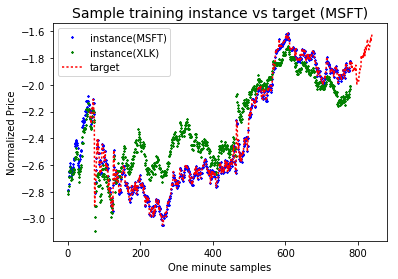

In [122]:
#
# Set the data batch generation parameters
# Generate a sample instance and target for visualization purpose
#
import matplotlib.pyplot as plt

n_days = 2                        # window of contiguous trading days
n_samples_hour = 60               # number of samples per hour (input: one-min samples)
n_samples_day = 6.5 * n_samples_hour # 09:30 to 16:00 EST trading hour window (6.5 hours)
n_steps = int(n_days * n_samples_day)
n_lag = 60                        # n_steps to predict into future (60 samples = 1 hour)
batch_size = 50

X_batch, y_batch=next_batch(prices_train, batch_size, n_steps, n_lag)
print('X_batch shape:', X_batch.shape)
print('y_batch shape:', y_batch.shape)
print('------------------------------')

# Plot instance vs target values
# note that we cannot use DateTime column due to discontinuity of data (after market)
x_label=np.arange(0, n_steps+n_lag, 1).tolist()
plt.title("Sample training instance vs target (MSFT)", fontsize=14)
plt.plot(x_label[:n_steps], X_batch[0, :, 0], "b*", markersize=2, label="instance(MSFT)")
plt.plot(x_label[:n_steps], X_batch[0, :, 1], "g*", markersize=2, label="instance(XLK)")
plt.plot(x_label[n_lag:n_steps+n_lag], y_batch[0, :, 0], "r:", markersize=2, label="target")
plt.legend(loc="upper left")
plt.xlabel("One minute samples")
plt.ylabel("Normalized Price")
plt.show()

In [123]:
#
# Define RNN model with multi-steps
#
# Model parameters:
#           Learning rate = 0.001
#           Cell type = RNN with OutputProjectionWrapper
#              #Input steps = 780 (Samples for 2 consecutive trading days - 2 * 390)
#              #Target steps = 780
#              #neurons/cell = 100
#           Output activation: relu function
#           Optimizer = Adam
#           Loss function = MSE (mean squared error)
#           Training #epochs = 800
#           Batchsize = 50
#
reset_graph()

# RNN time-step model parameters
n_inputs = 2    # [MSFT, XLK]
n_neurons = 100
n_outputs = 1

# define RNN cell with output projection to get single value out of #n_neurons by having a FC layer
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# add FC layer to convert output vector of size 100 into one output that corresponds to time_series(t)
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [124]:
# Training parameters
learning_rate = 0.001
n_iterations = 800

loss = tf.reduce_mean(tf.square(outputs - y)) # Loss function: MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [125]:
#
# Training phase for multi time-step RNN
#
import time

#
# We have a vector of time-series values, train to produce the desired output for 'n' steps into future.
# We intend to predict every hour for a one full day - trading window of 6.5 hours. This corresponds 
# to a lag of 60, 120, 180, 240, 300, 360 steps into future.
# y_batch[t] = X_batch[t+n_lag]
#
start_time = time.time()
lag_list = [60, 120, 180, 240, 300, 360]  # predicting stock prices next trading day at each hour interval (upto 6hours)
with tf.Session() as sess:
    init.run()
    for lag in lag_list:
        print("Training for Lag= ", lag)
        for iteration in range(n_iterations):
            X_batch, y_batch=next_batch(prices_train, batch_size, n_steps, lag)        
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            if iteration % 100 == 0:
                mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
                print("\t", iteration, "\tMSE:", mse)
        print("Saving model weights for lag: ", lag)
        saver.save(sess, "./Proj_MSFT_multi_variate_2m_"+str(n_days)+"d_"+str(lag)) # not shown in the book
elapsed_time = time.time() - start_time
print("Total training time: ", round(elapsed_time, 2), "sec")

Training for Lag=  60
	 0 	MSE: 0.6466852
	 100 	MSE: 0.031829707
	 200 	MSE: 0.032647535
	 300 	MSE: 0.026365103
	 400 	MSE: 0.030400958
	 500 	MSE: 0.029980917
	 600 	MSE: 0.025226591
	 700 	MSE: 0.025200555
Saving model weights for lag:  60
Training for Lag=  120
	 0 	MSE: 0.04315259
	 100 	MSE: 0.047666036
	 200 	MSE: 0.04454953
	 300 	MSE: 0.038338248
	 400 	MSE: 0.045110796
	 500 	MSE: 0.050816964
	 600 	MSE: 0.045004655
	 700 	MSE: 0.04441566
Saving model weights for lag:  120
Training for Lag=  180
	 0 	MSE: 0.07498647
	 100 	MSE: 0.07220581
	 200 	MSE: 0.062200226
	 300 	MSE: 0.06289929
	 400 	MSE: 0.064034395
	 500 	MSE: 0.06833689
	 600 	MSE: 0.056347657
	 700 	MSE: 0.06620909
Saving model weights for lag:  180
Training for Lag=  240
	 0 	MSE: 0.09072445
	 100 	MSE: 0.054418877
	 200 	MSE: 0.083430514
	 300 	MSE: 0.069075204
	 400 	MSE: 0.05781528
	 500 	MSE: 0.08177281
	 600 	MSE: 0.07235812
	 700 	MSE: 0.0730878
Saving model weights for lag:  240
Training for Lag=  300
	 0

In [140]:
#
# Predict multi time-steps into the future
# Lets predict stock prices for the entire test-period. This also includes predicting outside of training period into 
# the near future. We predict 60 steps at a time.
#
results = pd.DataFrame(columns=['n_lag', 'hour_idx', 'DateTime', 'loss(MSE)', 'Close(Actual)', 'Close(Pred)', 'loss_normal'])
sequence = prices_test['stock.CloseNormal'].tolist()   # test input

print('#Test Prices(initial): ', len(sequence))
print('----------------------------------------------------------------------------------------')

lag_list = [60, 120, 180, 240, 300, 360]   # num of samples to predict into future
for hour_idx, lag in enumerate(lag_list):
    with tf.Session() as sess:
        print("Restore model with lag: ", lag)
        saver.restore(sess, "./Proj_MSFT_multi_variate_2m_"+str(n_days)+"d_"+str(lag))
        #
        # Collect predictions over the entire test period that stretches beyond the training period
        #
        pred_values = sequence[:n_steps]  # initialize first n_steps with original sequence values
        cum_mse = []
        for i in range(n_steps, len(sequence), lag):
            X_batch = np.array(prices_test.iloc[i-n_steps:i, model_cols[0]]).reshape(1, n_steps, 2) # pick n_steps values from the sequence
            y_pred = sess.run(outputs, feed_dict={X: X_batch})               # predicted values are the last lag values
            y_pred_values=y_pred[0, -lag:, 0].tolist()                       # pick last lag values
            pred_values.extend([round(item, 6) for item in y_pred_values])   # accumulate predicted values

            mse = tf.reduce_mean(tf.square(y_pred - X_batch))                # calc MSE for test data
            cum_mse.append(mse.eval())
            print('\tX-batch[', i-n_steps, ':', i, '], MSE: ', round(mse.eval(), 4), ', y-batch[', i-n_steps+n_lag, ':', len(pred_values), ']')
        print('----------------------------------------------------------------------------------------')
        print('\t#Test Prices: ', len(sequence))
        print('\t#Predicted values: ', len(pred_values))

        # Add predicted prices to dataframe
        pred_col_name = 'ClosePred'+str(lag)
        seq = pd.Series(pred_values[:prices_test.shape[0]])
        prices_test[pred_col_name] = (seq.values*std) + mean
        
        # MSE calculation for pred values
        mse_normalized = round(np.mean(cum_mse), 4)
        print('\tMSE(normalized): ', mse_normalized)
        mse_price = round((mse_normalized*std + mean), 4)
        print('\tMSE(prices):', mse_price)    # MSE in terms of stock price

        # append to results dataframe
        datetime_lag = test_pred_start + pd.Timedelta(str(lag)+' min')
        actual_price_lag = prices_test[prices_test['DateTime']==datetime_lag]['Close'].values[0]      
        pred_price_lag = prices_test[prices_test['DateTime']==datetime_lag][pred_col_name].values[0]              
        print('\t', datetime_lag, 'Actual: ', actual_price_lag, 'Pred: ', pred_price_lag)
        results.loc[hour_idx] = [lag, hour_idx+1, datetime_lag, mse_price, actual_price_lag, pred_price_lag, mse_normalized]

#Test Prices(initial):  17527
----------------------------------------------------------------------------------------
Restore model with lag:  60
INFO:tensorflow:Restoring parameters from ./Proj_MSFT_multi_variate_2m_2d_60
	X-batch[ 0 : 780 ], MSE:  0.9774 , y-batch[ 60 : 840 ]
	X-batch[ 60 : 840 ], MSE:  0.9693 , y-batch[ 120 : 900 ]
	X-batch[ 120 : 900 ], MSE:  0.9477 , y-batch[ 180 : 960 ]
	X-batch[ 180 : 960 ], MSE:  0.9247 , y-batch[ 240 : 1020 ]
	X-batch[ 240 : 1020 ], MSE:  0.9033 , y-batch[ 300 : 1080 ]
	X-batch[ 300 : 1080 ], MSE:  0.8788 , y-batch[ 360 : 1140 ]
	X-batch[ 360 : 1140 ], MSE:  0.8361 , y-batch[ 420 : 1200 ]
	X-batch[ 420 : 1200 ], MSE:  0.7826 , y-batch[ 480 : 1260 ]
	X-batch[ 480 : 1260 ], MSE:  0.7362 , y-batch[ 540 : 1320 ]
	X-batch[ 540 : 1320 ], MSE:  0.6942 , y-batch[ 600 : 1380 ]
	X-batch[ 600 : 1380 ], MSE:  0.6537 , y-batch[ 660 : 1440 ]
	X-batch[ 660 : 1440 ], MSE:  0.6021 , y-batch[ 720 : 1500 ]
	X-batch[ 720 : 1500 ], MSE:  0.5538 , y-batch[ 780 : 1

c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


	X-batch[ 0 : 780 ], MSE:  0.9609 , y-batch[ 60 : 900 ]
	X-batch[ 120 : 900 ], MSE:  0.9313 , y-batch[ 180 : 1020 ]
	X-batch[ 240 : 1020 ], MSE:  0.8789 , y-batch[ 300 : 1140 ]
	X-batch[ 360 : 1140 ], MSE:  0.8042 , y-batch[ 420 : 1260 ]
	X-batch[ 480 : 1260 ], MSE:  0.6895 , y-batch[ 540 : 1380 ]
	X-batch[ 600 : 1380 ], MSE:  0.5974 , y-batch[ 660 : 1500 ]
	X-batch[ 720 : 1500 ], MSE:  0.5002 , y-batch[ 780 : 1620 ]
	X-batch[ 840 : 1620 ], MSE:  0.3895 , y-batch[ 900 : 1740 ]
	X-batch[ 960 : 1740 ], MSE:  0.2583 , y-batch[ 1020 : 1860 ]
	X-batch[ 1080 : 1860 ], MSE:  0.1574 , y-batch[ 1140 : 1980 ]
	X-batch[ 1200 : 1980 ], MSE:  0.093 , y-batch[ 1260 : 2100 ]
	X-batch[ 1320 : 2100 ], MSE:  0.0478 , y-batch[ 1380 : 2220 ]
	X-batch[ 1440 : 2220 ], MSE:  0.0242 , y-batch[ 1500 : 2340 ]
	X-batch[ 1560 : 2340 ], MSE:  0.0096 , y-batch[ 1620 : 2460 ]
	X-batch[ 1680 : 2460 ], MSE:  0.0135 , y-batch[ 1740 : 2580 ]
	X-batch[ 1800 : 2580 ], MSE:  0.014 , y-batch[ 1860 : 2700 ]
	X-batch[ 1920 : 

In [141]:
# Predictions across different lags into future
prices_test[n_steps:][['DateTime', 'Close', 'stock.CloseNormal', 'ClosePred60', 'ClosePred120', 'ClosePred180', 'ClosePred240', 'ClosePred300', 'ClosePred360']]    # print

,DateTime,Close,stock.CloseNormal,ClosePred60,ClosePred120,ClosePred180,ClosePred240,ClosePred300,ClosePred360
DateTime,,,,,,,,,
2014-09-03 15:59:00,2014-09-03 15:59:00,41.4032,-0.680957,41.470833,41.543857,41.557897,41.469964,41.464019,41.398882
2014-09-03 16:00:00,2014-09-03 16:00:00,41.4078,-0.676539,41.467795,41.537166,41.557683,41.471024,41.466222,41.403199
2014-09-04 09:30:00,2014-09-04 09:30:00,41.3986,-0.685375,41.461100,41.528405,41.548245,41.466987,41.469330,41.410060
2014-09-04 09:31:00,2014-09-04 09:31:00,41.3618,-0.720716,41.450116,41.525893,41.546375,41.461623,41.473308,41.411957
2014-09-04 09:32:00,2014-09-04 09:32:00,41.3526,-0.729552,41.444571,41.528424,41.541563,41.465180,41.469803,41.409154
2014-09-04 09:33:00,2014-09-04 09:33:00,41.3526,-0.729552,41.447036,41.527306,41.539501,41.468509,41.470302,41.403500
2014-09-04 09:34:00,2014-09-04 09:34:00,41.3618,-0.720716,41.452793,41.530297,41.546661,41.473017,41.472751,41.401820
2014-09-04 09:35:00,2014-09-04 09:35:00,41.4723,-0.614595,41.460467,41.530931,41.556120,41.477068,41.477911,41.399751
2014-09-04 09:36:00,2014-09-04 09:36:00,41.4594,-0.626984,41.462303,41.533447,41.563058,41.476792,41.482857,41.389293


In [142]:
# display predicted results at each hour
results

,n_lag,hour_idx,DateTime,loss(MSE),Close(Actual),Close(Pred),loss_normal
0,60.0,1.0,2014-11-03 10:30:00,42.1931,43.5169,43.159263,0.0776
1,120.0,2.0,2014-11-03 11:30:00,42.1892,43.4709,43.202101,0.0739
2,180.0,3.0,2014-11-03 12:30:00,42.1972,43.5353,43.254904,0.0816
3,240.0,4.0,2014-11-03 13:30:00,42.1970,43.6274,43.291614,0.0814
4,300.0,5.0,2014-11-03 14:30:00,42.2360,43.6550,43.418352,0.1188
5,360.0,6.0,2014-11-03 15:30:00,42.2256,43.5906,43.341348,0.1089


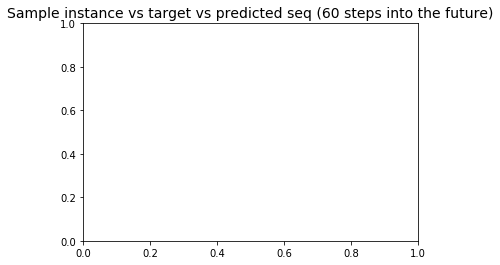

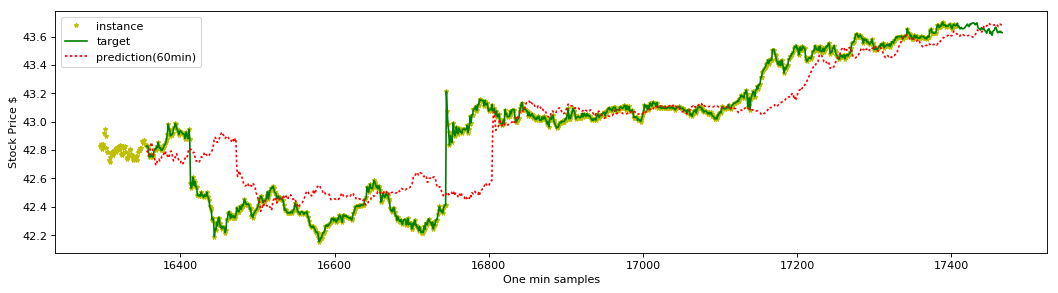

In [144]:
import matplotlib.pyplot as plt

# Plot instance vs target vs predicted values  (for 60min into future)
# Print for an approximate time window of last 5 days of the month
lag=60
start=len(prices_train)-n_steps   # last 5 days of the month
x_label=np.arange(0, len(prices_test['Close']), 1).tolist()

plt.title("Sample instance vs target vs predicted seq (60 steps into the future)", fontsize=14)
plt.figure(figsize=(16,4), dpi=80)
plt.subplot(1,1,1)
plt.plot(x_label[start-lag:-2*lag], prices_test['Close'][start-lag:-2*lag], "y*", markersize=4, label="instance")
plt.plot(x_label[start:-lag], prices_test['Close'][start:-lag], "g-", markersize=1, label="target")
plt.plot(x_label[start:-lag], prices_test['ClosePred60'][start:-lag], "r:", markersize=2, label="prediction(60min)")

plt.legend(loc="upper left")
plt.xlabel("One min samples")
plt.ylabel("Stock Price $")
plt.show()

<a id='RNN_MSFT_XLK_Chart'></a>

[next experiment chart](#RNN_MSFT_XLK_Chart2)

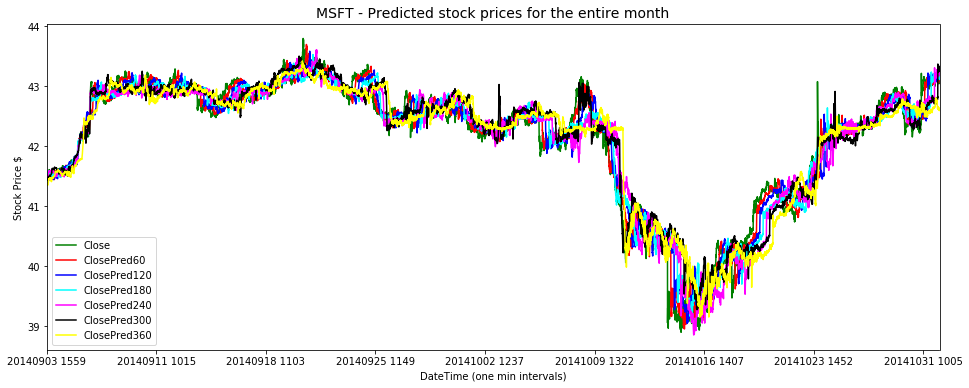

In [145]:
plt.figure(figsize=(16,6))
plt.subplot(111)
lag=450                            # skip last batch of values across to have same time frame for all predictions.
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='Close', color='green', ax=plt.gca())   # Actual close prices
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred60', color='red', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred120', color='blue', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred180', color='cyan', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred240', color='magenta', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred300', color='black', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred360', color='yellow', ax=plt.gca())
plt.title("MSFT - Predicted stock prices for the entire month", fontsize=14)
plt.xlabel("DateTime (one min intervals)")
plt.ylabel("Stock Price $")
plt.show()

## OBSERVATION: 
1. We see that the predictions overall very tight and remains same regardless of prediction window size. The performance of multi-variate analysis is relatively better compared to the single-variate analysis in the previous task (Task#3). This is evident from the lower loss (MSE) values here. Part of the reason could be that we picked the best time-period in 2014 where MSFT prices positively correlated the most against XLK prices (corr=0.968).

2. We do clearly see that the predictions have picked-up for short term (60min window) and overall, picked up the long-term patterns. 

[back-to-top](#back-to-top)
<a id='RNN_MSFT_XLK_1'></a>

##                                Task:4 Effect of XLK prices on MSFT price - Study1
### From our single-variate analysis on single stock, we learnt that model that predicted stock prices performed better compared to the model that predicted stock returns or up/down indicators. We will now perform a multi-variate price prediction for MSFT stock price (one-minute intervals) using the effects of tech sector ETF (XLK) prices. This experiment uses the same time-period (2014/01 to 2014/02) as the single-variate analysis in Task#3 
(see MSFT-RNN-single-variate.ipynb).


In [157]:
#
# set training and test periods
#
train_startdate='2014-01-01 00:00:00'  # train start-date
train_lastdate='2014-03-01 00:00:00'   # train end-date (2 months of trading data)
test_startdate=train_startdate         # same as train start-date
test_lastdate='2014-03-03 23:59:00'    # test end-date (extends beyond training date for short term predictions)
test_pred_start = pd.to_datetime('2014-03-03 09:30:00', format="%Y-%m-%d %H:%M:%S") # we will predict prices at one hour interval on this day

MSFT_PRICE_COLUMN_NUM = stockdata.columns.get_loc('Close')   # MSFT stock price column
XLK_PRICE_COLUMN_NUM = stockdata.columns.get_loc('etf.Close')

In [148]:
# Fetch stock samples into a numpy array (for training purpose)
print('train: [', train_startdate, ':', train_lastdate, ']')
print('test: [', test_startdate, ':', test_lastdate, ']')
print()
prices_train = stockdata.loc[(stockdata['DateTime'] > train_startdate) & (stockdata['DateTime'] < train_lastdate)]
print('#train samples:', len(prices_train['DateTime']))
prices_test  = stockdata.loc[(stockdata['DateTime'] > test_startdate) & (stockdata['DateTime'] < test_lastdate)]
print('#test samples:', len(prices_test['DateTime']))
prices_test

train: [ 2014-01-01 00:00:00 : 2014-03-01 00:00:00 ]
test: [ 2014-01-01 00:00:00 : 2014-03-03 23:59:00 ]

#train samples: 15613
#test samples: 16004


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,DateTime,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,2014-01-02 09:30:00,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,2014-01-02 09:31:00,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,2014-01-02 09:32:00,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,2014-01-02 09:33:00,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,2014-01-02 09:34:00,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244,1,0,0.0,...,2014-01-02 09:35:00,-0.152891,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677,1,0,0.0,...,2014-01-02 09:36:00,-0.187625,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999,1,0,0.0,...,2014-01-02 09:37:00,-0.107172,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894,1,0,0.0,...,2014-01-02 09:38:00,-0.107172,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891


In [149]:
#
# Normalize the MSFT stock price using mean/SD - 
#
mean = prices_train['Close'].mean()
std = prices_train['Close'].std()
print("MSFT close price mean:", round(mean, 2), ", std:", round(std, 4))
prices_train['stock.CloseNormal'] = (prices_train['Close'] - mean) / std
prices_test['stock.CloseNormal'] = (prices_test['Close'] - mean) / std
prices_test

MSFT close price mean: 33.23 , std: 0.7669


c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,stock.CumReturn,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn,stock.CloseNormal
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,0.000000,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000,0.588654
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,0.093516,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932,0.629727
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,-0.214344,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118,0.494512
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,-0.214344,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396,0.494512
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,-0.160906,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278,0.517982
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244,1,0,0.0,...,-0.152891,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118,0.521503
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677,1,0,0.0,...,-0.187625,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631,0.506247
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999,1,0,0.0,...,-0.107172,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791,0.541583
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894,1,0,0.0,...,-0.107172,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891,0.541583


In [150]:
#
# Normalize the XLK stock price using mean/SD - 
#
mean_etf = prices_train['etf.Close'].mean()
std_etf = prices_train['etf.Close'].std()
print("XLK close price mean:", round(mean_etf, 2), ", std:", round(std_etf, 4))
prices_train['etf.CloseNormal'] = (prices_train['etf.Close'] - mean_etf) / std_etf
prices_test['etf.CloseNormal'] = (prices_test['etf.Close'] - mean_etf) / std_etf
prices_test

XLK close price mean: 33.11 , std: 0.5761


c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Time,Open,High,Low,Close,Volume,SplitFactor,Earnings,Dividends,...,etf.Open,etf.Close,etf.Return,etf.CumReturn,spy.Open,spy.Close,spy.Return,spy.CumReturn,stock.CloseNormal,etf.CloseNormal
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-01-02 09:30:00,20140102,930,33.6932,33.7383,33.6661,33.6842,1319510,1,0,0.0,...,33.2818,33.2164,-0.196504,0.000000,170.607,170.524,-0.048650,0.000000,0.588654,0.182508
2014-01-02 09:31:00,20140102,931,33.6932,33.7293,33.6661,33.7157,206817,1,0,0.0,...,33.2164,33.2024,-0.042148,-0.042148,170.524,170.529,0.002932,0.002932,0.629727,0.158205
2014-01-02 09:32:00,20140102,932,33.7112,33.7293,33.6030,33.6120,227216,1,0,0.0,...,33.2071,33.2071,0.000000,-0.027998,170.524,170.589,0.038118,0.038118,0.494512,0.166364
2014-01-02 09:33:00,20140102,933,33.6120,33.6300,33.5759,33.6120,170074,1,0,0.0,...,33.2164,33.2118,-0.013849,-0.013849,170.580,170.598,0.010552,0.043396,0.494512,0.174523
2014-01-02 09:34:00,20140102,934,33.6120,33.6391,33.6120,33.6300,48095,1,0,0.0,...,33.2118,33.1891,-0.068349,-0.082188,170.598,170.515,-0.048652,-0.005278,0.517982,0.135117
2014-01-02 09:35:00,20140102,935,33.6300,33.6481,33.6120,33.6327,61244,1,0,0.0,...,33.1978,33.1884,-0.028315,-0.084296,170.524,170.459,-0.038118,-0.038118,0.521503,0.133902
2014-01-02 09:36:00,20140102,936,33.6300,33.6481,33.6210,33.6210,24677,1,0,0.0,...,33.1881,33.1791,-0.027118,-0.112294,170.450,170.320,-0.076269,-0.119631,0.506247,0.117758
2014-01-02 09:37:00,20140102,937,33.6300,33.6526,33.6210,33.6481,120999,1,0,0.0,...,33.1791,33.1976,0.055758,-0.056599,170.315,170.376,0.035816,-0.086791,0.541583,0.149873
2014-01-02 09:38:00,20140102,938,33.6391,33.6481,33.6120,33.6481,112894,1,0,0.0,...,33.1931,33.1791,-0.042177,-0.112294,170.367,170.236,-0.076893,-0.168891,0.541583,0.117758


In [151]:
#
# Define the same RNN model with multi-steps
#
reset_graph()

# RNN time-step model parameters
n_inputs = 2    # [MSFT, XLK]
n_neurons = 100
n_outputs = 1

# define RNN cell with output projection to get single value out of #n_neurons by having a FC layer
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# add FC layer to convert output vector of size 100 into one output that corresponds to time_series(t)
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [152]:
# Training parameters
learning_rate = 0.001
n_iterations = 800

loss = tf.reduce_mean(tf.square(outputs - y)) # Loss function: MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [153]:
#
# Training phase for multi time-step RNN
#
import time

#
# We have a vector of time-series values, train to produce the desired output for 'n' steps into future.
# We intend to predict every hour for a one full day - trading window of 6.5 hours. This corresponds 
# to a lag of 60, 120, 180, 240, 300, 360 steps into future.
# y_batch[t] = X_batch[t+n_lag]
#
start_time = time.time()
lag_list = [60, 120, 180, 240, 300, 360]  # predicting stock prices next trading day at each hour interval (upto 6hours)
with tf.Session() as sess:
    init.run()
    for lag in lag_list:
        print("Training for Lag= ", lag)
        for iteration in range(n_iterations):
            X_batch, y_batch=next_batch(prices_train, batch_size, n_steps, lag)        
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            if iteration % 100 == 0:
                mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
                print("\t", iteration, "\tMSE:", mse)
        print("Saving model weights for lag: ", lag)
        saver.save(sess, "./Proj_MSFT_multi_variate2_2m_"+str(n_days)+"d_"+str(lag)) # not shown in the book
elapsed_time = time.time() - start_time
print("Total training time: ", round(elapsed_time, 2), "sec")

Training for Lag=  60
	 0 	MSE: 0.6006964
	 100 	MSE: 0.049551595
	 200 	MSE: 0.047157962
	 300 	MSE: 0.040962614
	 400 	MSE: 0.040522613
	 500 	MSE: 0.03372748
	 600 	MSE: 0.036085915
	 700 	MSE: 0.03904175
Saving model weights for lag:  60
Training for Lag=  120
	 0 	MSE: 0.07170652
	 100 	MSE: 0.06283994
	 200 	MSE: 0.052492738
	 300 	MSE: 0.073701106
	 400 	MSE: 0.06302868
	 500 	MSE: 0.05644151
	 600 	MSE: 0.060892392
	 700 	MSE: 0.06793305
Saving model weights for lag:  120
Training for Lag=  180
	 0 	MSE: 0.1011363
	 100 	MSE: 0.08104895
	 200 	MSE: 0.07204907
	 300 	MSE: 0.08212627
	 400 	MSE: 0.07357414
	 500 	MSE: 0.063198015
	 600 	MSE: 0.058173973
	 700 	MSE: 0.07395672
Saving model weights for lag:  180
Training for Lag=  240
	 0 	MSE: 0.14234455
	 100 	MSE: 0.10961259
	 200 	MSE: 0.107693136
	 300 	MSE: 0.11575661
	 400 	MSE: 0.08836767
	 500 	MSE: 0.09148286
	 600 	MSE: 0.08169633
	 700 	MSE: 0.08401133
Saving model weights for lag:  240
Training for Lag=  300
	 0 	MSE: 

In [159]:
#
# Predict multi time-steps into the future
# Lets predict stock prices for the last five days in the input sequence. We predict 60 steps at a time.
#
results = pd.DataFrame(columns=['n_lag', 'hour_idx', 'DateTime', 'loss(MSE)', 'Close(Actual)', 'Close(Pred)', 'loss_normal'])
sequence = prices_test['stock.CloseNormal'].tolist()   # test input

print('#Test Prices(initial): ', len(sequence))
print('----------------------------------------------------------------------------------------')

lag_list = [60, 120, 180, 240, 300, 360]   # num of samples to predict into future
for hour_idx, lag in enumerate(lag_list):
    with tf.Session() as sess:
        print("Restore model with lag: ", lag)
        saver.restore(sess, "./Proj_MSFT_multi_variate2_2m_"+str(n_days)+"d_"+str(lag))
        #
        # Collect predictions over the entire test period that stretches beyond the training period
        #
        pred_values = sequence[:n_steps]  # initialize first n_steps with original sequence values
        cum_mse = []
        for i in range(n_steps, len(sequence), lag):
            X_batch = np.array(prices_test.iloc[i-n_steps:i, model_cols[0]]).reshape(1, n_steps, 2) # pick n_steps values from the sequence
            y_pred = sess.run(outputs, feed_dict={X: X_batch})               # predicted values are the last lag values
            y_pred_values=y_pred[0, -lag:, 0].tolist()                       # pick last lag values
            pred_values.extend([round(item, 6) for item in y_pred_values])   # accumulate predicted values

            mse = tf.reduce_mean(tf.square(y_pred - X_batch))                # calc MSE for test data
            cum_mse.append(mse.eval())
            print('\tX-batch[', i-n_steps, ':', i, '], MSE: ', round(mse.eval(), 4), ', y-batch[', i-n_steps+n_lag, ':', len(pred_values), ']')
        print('----------------------------------------------------------------------------------------')
        print('\t#Test Prices: ', len(sequence))
        print('\t#Predicted values: ', len(pred_values))

        # Add predicted prices to dataframe
        pred_col_name = 'ClosePred'+str(lag)
        seq = pd.Series(pred_values[:prices_test.shape[0]])
        prices_test[pred_col_name] = (seq.values*std) + mean
        
        # MSE calculation for pred values
        mse_normalized = round(np.mean(cum_mse), 4)
        print('\tMSE(normalized): ', mse_normalized)
        mse_price = round((mse_normalized*std + mean), 4)
        print('\tMSE(prices):', mse_price)    # MSE in terms of stock price

        # append to results dataframe
        datetime_lag = test_pred_start + pd.Timedelta(str(lag)+' min')
        actual_price_lag = prices_test[prices_test['DateTime']==datetime_lag]['Close'].values[0]      
        pred_price_lag = prices_test[prices_test['DateTime']==datetime_lag][pred_col_name].values[0]              
        print('\t', datetime_lag, 'Actual: ', actual_price_lag, 'Pred: ', pred_price_lag)
        results.loc[hour_idx] = [lag, hour_idx+1, datetime_lag, mse_price, actual_price_lag, pred_price_lag, mse_normalized]

#Test Prices(initial):  16004
----------------------------------------------------------------------------------------
Restore model with lag:  60
INFO:tensorflow:Restoring parameters from ./Proj_MSFT_multi_variate2_2m_2d_60
	X-batch[ 0 : 780 ], MSE:  0.0683 , y-batch[ 60 : 840 ]
	X-batch[ 60 : 840 ], MSE:  0.0625 , y-batch[ 120 : 900 ]
	X-batch[ 120 : 900 ], MSE:  0.0584 , y-batch[ 180 : 960 ]
	X-batch[ 180 : 960 ], MSE:  0.0528 , y-batch[ 240 : 1020 ]
	X-batch[ 240 : 1020 ], MSE:  0.0473 , y-batch[ 300 : 1080 ]
	X-batch[ 300 : 1080 ], MSE:  0.0445 , y-batch[ 360 : 1140 ]
	X-batch[ 360 : 1140 ], MSE:  0.0477 , y-batch[ 420 : 1200 ]
	X-batch[ 420 : 1200 ], MSE:  0.0535 , y-batch[ 480 : 1260 ]
	X-batch[ 480 : 1260 ], MSE:  0.0685 , y-batch[ 540 : 1320 ]
	X-batch[ 540 : 1320 ], MSE:  0.081 , y-batch[ 600 : 1380 ]
	X-batch[ 600 : 1380 ], MSE:  0.0948 , y-batch[ 660 : 1440 ]
	X-batch[ 660 : 1440 ], MSE:  0.1086 , y-batch[ 720 : 1500 ]
	X-batch[ 720 : 1500 ], MSE:  0.1226 , y-batch[ 780 : 1

c:\users\mpatnam\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


	X-batch[ 0 : 780 ], MSE:  0.0715 , y-batch[ 60 : 900 ]
	X-batch[ 120 : 900 ], MSE:  0.0589 , y-batch[ 180 : 1020 ]
	X-batch[ 240 : 1020 ], MSE:  0.0426 , y-batch[ 300 : 1140 ]
	X-batch[ 360 : 1140 ], MSE:  0.0377 , y-batch[ 420 : 1260 ]
	X-batch[ 480 : 1260 ], MSE:  0.0615 , y-batch[ 540 : 1380 ]
	X-batch[ 600 : 1380 ], MSE:  0.0998 , y-batch[ 660 : 1500 ]
	X-batch[ 720 : 1500 ], MSE:  0.1321 , y-batch[ 780 : 1620 ]
	X-batch[ 840 : 1620 ], MSE:  0.2069 , y-batch[ 900 : 1740 ]
	X-batch[ 960 : 1740 ], MSE:  0.3208 , y-batch[ 1020 : 1860 ]
	X-batch[ 1080 : 1860 ], MSE:  0.4501 , y-batch[ 1140 : 1980 ]
	X-batch[ 1200 : 1980 ], MSE:  0.5791 , y-batch[ 1260 : 2100 ]
	X-batch[ 1320 : 2100 ], MSE:  0.6755 , y-batch[ 1380 : 2220 ]
	X-batch[ 1440 : 2220 ], MSE:  0.7681 , y-batch[ 1500 : 2340 ]
	X-batch[ 1560 : 2340 ], MSE:  0.8462 , y-batch[ 1620 : 2460 ]
	X-batch[ 1680 : 2460 ], MSE:  0.8022 , y-batch[ 1740 : 2580 ]
	X-batch[ 1800 : 2580 ], MSE:  0.7454 , y-batch[ 1860 : 2700 ]
	X-batch[ 1920 

In [160]:
# Display predicted results into the future (outside of training period)
results

,n_lag,hour_idx,DateTime,loss(MSE),Close(Actual),Close(Pred),loss_normal
0,60.0,1.0,2014-03-03 10:30:00,33.5700,34.3095,34.685384,0.4398
1,120.0,2.0,2014-03-03 11:30:00,33.5805,34.1731,34.619664,0.4535
2,180.0,3.0,2014-03-03 12:30:00,33.5602,34.1731,34.660578,0.4270
3,240.0,4.0,2014-03-03 13:30:00,33.6010,34.2185,34.529850,0.4802
4,300.0,5.0,2014-03-03 14:30:00,33.6075,34.2186,34.418596,0.4887
5,360.0,6.0,2014-03-03 15:30:00,33.6187,34.2299,34.471258,0.5032


In [161]:
# Predictions across different lags into future
prices_test[n_steps:][['DateTime', 'Close', 'stock.CloseNormal', 'ClosePred60', 'ClosePred120', 'ClosePred180', 'ClosePred240', 'ClosePred300', 'ClosePred360']]    # print

,DateTime,Close,stock.CloseNormal,ClosePred60,ClosePred120,ClosePred180,ClosePred240,ClosePred300,ClosePred360
DateTime,,,,,,,,,
2014-01-06 09:31:00,2014-01-06 09:31:00,33.2151,-0.023006,33.138360,33.207637,33.245201,33.503600,33.118354,33.223978
2014-01-06 09:32:00,2014-01-06 09:32:00,33.2015,-0.040739,33.122013,33.200628,33.233648,33.494816,33.126875,33.236106
2014-01-06 09:33:00,2014-01-06 09:33:00,33.2151,-0.023006,33.108829,33.205598,33.229312,33.489758,33.139515,33.257600
2014-01-06 09:34:00,2014-01-06 09:34:00,33.1880,-0.058341,33.096288,33.203752,33.233076,33.474063,33.146562,33.250073
2014-01-06 09:35:00,2014-01-06 09:35:00,33.1069,-0.164088,33.092477,33.200546,33.237693,33.431188,33.147809,33.253217
2014-01-06 09:36:00,2014-01-06 09:36:00,33.1294,-0.134750,33.089819,33.195133,33.235261,33.372590,33.127319,33.240382
2014-01-06 09:37:00,2014-01-06 09:37:00,33.1339,-0.128882,33.082339,33.204913,33.237703,33.283281,33.104635,33.205901
2014-01-06 09:38:00,2014-01-06 09:38:00,33.1429,-0.117147,33.082579,33.208526,33.244138,33.219347,33.092523,33.170541
2014-01-06 09:39:00,2014-01-06 09:39:00,33.1428,-0.117278,33.088068,33.206394,33.246265,33.192626,33.085981,33.152584


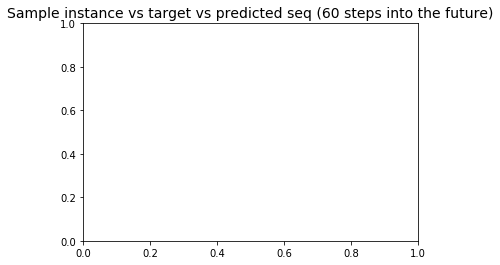

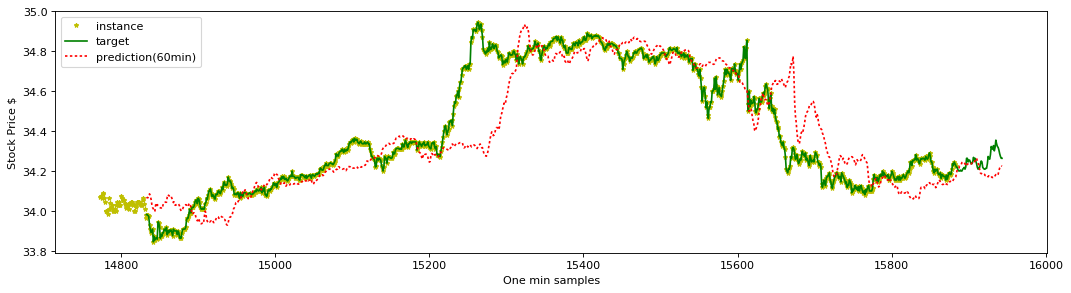

In [162]:
import matplotlib.pyplot as plt

# Plot instance vs target vs predicted values  (for 60min into future)
# Print for an approximate time window of last 5 days of the month
lag=60
start=len(prices_train)-n_steps   # last 5 days of the month
x_label=np.arange(0, len(prices_test['Close']), 1).tolist()

plt.title("Sample instance vs target vs predicted seq (60 steps into the future)", fontsize=14)
plt.figure(figsize=(16,4), dpi=80)
plt.subplot(1,1,1)
plt.plot(x_label[start-lag:-2*lag], prices_test['Close'][start-lag:-2*lag], "y*", markersize=4, label="instance")
plt.plot(x_label[start:-lag], prices_test['Close'][start:-lag], "g-", markersize=1, label="target")
plt.plot(x_label[start:-lag], prices_test['ClosePred60'][start:-lag], "r:", markersize=2, label="prediction(60min)")

plt.legend(loc="upper left")
plt.xlabel("One min samples")
plt.ylabel("Stock Price $")
plt.show()

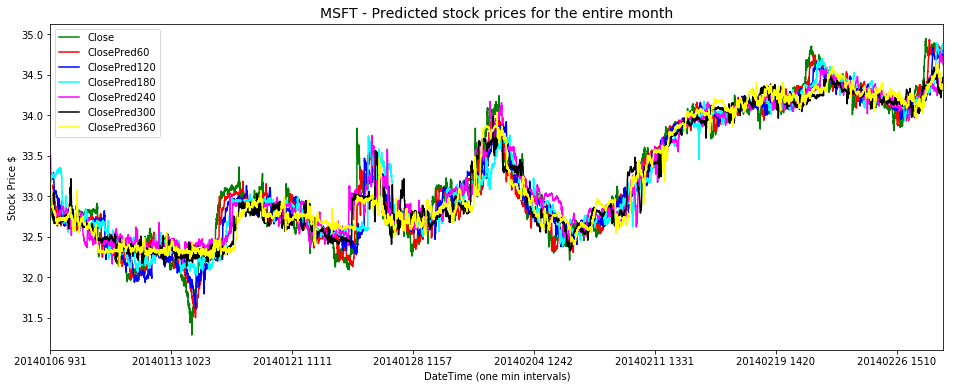

In [164]:
plt.figure(figsize=(16,6))
plt.subplot(111)
lag=450                            # skip last batch of values across to have same time frame for all predictions.
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='Close', color='green', ax=plt.gca())   # Actual close prices
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred60', color='red', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred120', color='blue', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred180', color='cyan', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred240', color='magenta', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred300', color='black', ax=plt.gca())
prices_test.iloc[n_steps:-lag].plot(x='DateTimeStr', y='ClosePred360', color='yellow', ax=plt.gca())
plt.title("MSFT - Predicted stock prices for the entire month", fontsize=14)
plt.xlabel("DateTime (one min intervals)")
plt.ylabel("Stock Price $")
plt.show()

<a id='RNN_MSFT_XLK_Chart2'></a>

[prev experiment chart](#RNN_MSFT_XLK_Chart)

### OBSERVATION: 
1. We can compare the performance of multi-variate price prediction (MSFT stock) here against the single-variate in the previous task (Task#3). It appears multi-variate prediction didn't improve much over single-variate as is evident from the loss (MSE) values. Though MSFT prices are modestly correlated (positiviely) w.r.t XLK stock(corr=0.631), appears it didn't provide enough boost to improve the accuracy of price prediction in the multi-variate scenario.
2. We predicted MSFT prices for different lags (60mins to 360mins) into the future. 